In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
import xlrd
import sklearn
import math
import os
import re
import copy
# import numba
# from numba import njit
# from numba import jit

# from numba import prange
import plotly
from datetime import date


plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
from time import time
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import *
from sklearn.model_selection import ShuffleSplit


from os import listdir
from os.path import isfile, join
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

import tqdm
from tqdm import tqdm, trange
import multiprocessing as mp

import sys
np.set_printoptions(threshold=1000)

In [2]:
##########################
# SAVE-LOAD using pickle #
##########################
import pickle
# save
def saver(model, model_name):
    path_import = '.'
    with open(path_import + '/' + model_name + '.pkl','wb') as f:
        pickle.dump(model, f, protocol=5)
        print('saved in ' + str(f.name))

# load
def opener(model_name):
    path_import = '.'
    name = str(model_name)
    name = path_import + '/' + name + '.pkl'
    print(name)
    with open(name, 'rb') as f:
        model = pickle.load(f, encoding='bytes')
    return model

Функция подсчета среднего значения в списке

In [3]:
def average_in_list(list):
    """
    Функция подсчета среднего значения в списке
    param: list -- список для поиска среднего

    return summ / len(list) -- среднее значения в списке
    """
    summ = 0
    for i in list:
        summ += i
    return summ / len(list)

Функция для считывания данных из отчетных файлов ПО Abaqus

In [4]:
def read_data_txt_np(name_of_file, example_dir):
    """
    Функция для считывания данных из отчетных файлов ПО Abaqus
    params:
    name_of_file -- имя файла
    example_dir -- директория файла

    return:
    data -- считанные данные
    """
    data_flag = 0
    content = os.listdir(example_dir)
    if os.path.isfile(os.path.join(example_dir, name_of_file)):
        if name_of_file in content:
            file = os.path.join(example_dir, name_of_file)
            if file.endswith('.txt'):
                # data = np.loadtxt(file, dtype='double', skiprows=56) #thermal
                data = np.loadtxt(file, dtype='double', skiprows=44) #isothermal
                data_flag = 1
            else:
                print(f'{file} doesnt ends with .txt')
        else:
            print(f"No file {name_of_file} in such dir")
    else:
        print(f"No such file {name_of_file}")
        return -1
    return data



In [5]:
def files_list(list_one, dir_):
    """
    Функция для считывания данных для переданого списка
    params:
    list_one -- список файлов
    dir_ -- директория файлов

    return:
    list_files -- список считанных данных
    """
    list_files = []
    for i in range(0, len(list_one)):
        file = read_data_txt_np(list_one[i], dir_)
        list_files.append(file)

    return list_files

In [6]:
def median_np(x):
    """ Построение медианы по переданному списку """
    return np.median(x)

In [7]:
def preprocessing_res_np(file):
    """
    Создание np.array по репорту
    params:
    file -- считааные из `read_data_txt_np` данные

    return:
    x_1_    -- массив х координат узлов решетки
    y_1_    -- массив у координат узлов решетки
    Stress  -- массив массивов компонент тензора напряжений и интенсивностей напряжений
    Strain  -- массив массивов компонент тензора деформаций и интенсивностей деформаций
    """
    x_1 = (file[::, 1]) * 10 ** 3
    y_1 = (file[::, 2]) * 10 ** 3

    eps_11_name = file[::, 11]
    eps_22_name = file[::, 12]
    eps_33_name = file[::, 13]
    eps_12_name = file[::, 14]

    stress_11_name = (file[::, 3]) / 10 ** 6
    stress_22_name = (file[::, 4]) / 10 ** 6
    stress_33_name = (file[::, 5]) / 10 ** 6
    stress_12_name = (file[::, 6]) / 10 ** 6

    #nt11_name = (file[::,15])
    #temp_name = (file[::,16])

    index = 0

    x_1_ = np.zeros((1, 1))
    y_1_ = np.zeros((1, 1))
    Strain = np.zeros((1, 5))
    Stress = np.zeros((1, 5))
    #NT11 = np.zeros((1, 1))
    #TEMP = np.zeros((1, 1))
    #ind_ = np.zeros((1,1))
    for j in range(0, np.shape(y_1)[0]):
        if y_1[j] >= 0.25 * (np.max(y_1) - np.min(y_1)) and y_1[j] <= 0.75 * (np.max(y_1) - np.min(y_1)):
            x_1_[index] = x_1[j]
            y_1_[index] = y_1[j]
            #ind_[index] = j

            Stress[index, 0] = stress_11_name[j]
            Stress[index, 1] = stress_22_name[j]
            Stress[index, 2] = stress_33_name[j]
            Stress[index, 3] = stress_12_name[j]
            Stress[index, 4] = (1 / (np.sqrt(2))) * np.sqrt(
                (stress_11_name[j] - stress_22_name[j]) ** 2 + (stress_22_name[j] - stress_33_name[j]) ** 2 + (
                        stress_33_name[j] - stress_11_name[j]) ** 2 + 6 * (stress_12_name[j] ** 2))

            Strain[index, 0] = eps_11_name[j]
            Strain[index, 1] = eps_22_name[j]
            Strain[index, 2] = eps_33_name[j]
            Strain[index, 3] = eps_12_name[j]
            Strain[index, 4] = (1 / (np.sqrt(2))) * np.sqrt(
                (eps_11_name[j] - eps_22_name[j]) ** 2 + (eps_22_name[j] - eps_33_name[j]) ** 2 + (
                        eps_33_name[j] - eps_11_name[j]) ** 2 + 6 * (eps_12_name[j] ** 2))

            #NT11[index]=nt11_name[j]
            #TEMP[index]=temp_name[j]

            x_1_ = np.concatenate((x_1_, np.zeros((1, 1))))
            y_1_ = np.concatenate((y_1_, np.zeros((1, 1))))
            Stress = np.concatenate((Stress, np.zeros((1, 5))))
            Strain = np.concatenate((Strain, np.zeros((1, 5))))
            #NT11 = np.concatenate((NT11,np.zeros((1,1))))
            #TEMP = np.concatenate((TEMP,np.zeros((1,1))))
            index = index + 1

    x_1_ = np.delete(x_1_, -1)
    y_1_ = np.delete(y_1_, -1)
    Stress = np.delete(Stress, -1, axis=0)
    Strain = np.delete(Strain, -1, axis=0)

    x_1_, characteristics = sorter(x_1_, [y_1_, Stress, Strain])
    y_1_, Stress, Strain = characteristics[0], characteristics[1], characteristics[2]

    return x_1_, y_1_, Stress, Strain

In [8]:
def average_val_np(array_1, nodes=13):
    """ Построение осредненных распределений """
    b = np.zeros((nodes))
    for i in range(0, nodes):
        b[i] = np.median(np.array_split(array_1, nodes)[i])

    return b

In [9]:
def get_param(cur_job_name, vel20List, all20Arrays, char_1=2, char_2=4):
    """
    Функция для извлечения зависимых и независимых переменных для 1 расчета
    params:
    cur_job_name -- название расчетного файла до точки
    vel20List -- список всех имен расчетных файов
    all20Arrays -- список предобработанных данных
    char_1 -- индекс характеристики (2-напряжения, 3-деформации)
    char_2 -- индекс компоненты тензора, 4 - интенсивность

    return:
    [red, cal, ha, vel, fric, char] -- список требуемых характеристик
    (обжатие, коэффициент калибровочного участка, полуугол волоки, скорость, трение и искомая характеристика соотвественно)
    """
    int_res_stress_idx = vel20List.index(cur_job_name)

    char = average_val_np(all20Arrays[int_res_stress_idx][char_1][::, char_2], 20)

    red = r(cur_job_name)
    cal = c(cur_job_name)
    ha = h(cur_job_name)
    vel = v(cur_job_name)
    fric = f(cur_job_name)

    return [red, cal, ha, vel, fric, char]

In [10]:
def sorter(xx, heap_of_stresses):
    """
    Сортирует по возрастанию узлы по значению расстояния от оси проволоки и
        перегруппировывает значения в остальных массивах в соответствии с новыми
        значениями индексов, но больше не удаляет точку (0,0)
    :param xx: значения координат х
    :param heap_of_stresses: список характеристик
    :return: x_sorted, heap_of_stresses_sorted
    """

    heap_of_stresses_sorted = heap_of_stresses[:]
    ai = np.argsort(xx, axis=0)
    x_sorted = np.take_along_axis(xx, ai, axis=0)
    ai = ai.flatten()

    for idx, i in enumerate(heap_of_stresses):
        ai_i = np.copy(ai)
        if i.ndim > 1:    # alternatively use np.tile instead
            for j in range(i.shape[1]-1):
                ai_i = np.vstack((ai_i, ai))
            ai_i = ai_i.T
        heap_of_stresses_sorted[idx] = np.take_along_axis(i, ai_i, axis=0)
        # heap_of_stresses_sorted[idx] = np.delete(heap_of_stresses_sorted[idx], delete_idx)

    return x_sorted, heap_of_stresses_sorted

In [11]:
def r(job_name):
    """
    Ищет обжатие по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'red':
            found = splitted_job[i+1]
    reduct = float(found) / 10000
    return reduct

def c(job_name):
    """
    Ищет коэффициент калибровочного участка по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'cal':
            found = splitted_job[i+1]
    cali = float(found) / 100
    return cali


def f(job_name):
    """
    Ищет к-т трения по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'fric':
            found = splitted_job[i+1][1:]
    fr = float(found) / 1000
    return fr

def v(job_name):
    """
    Ищет скорость по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == 'vel':
            found = splitted_job[i+1]
    velo = int(found)
    return velo

def h(job_name):
    """
    Ищет полуугол по переданному имени файла
    """
    splitted_job = job_name.split('_')
    for i in range(len(splitted_job)):
        if splitted_job[i] == '2a':
            found = splitted_job[i+1]
    ha = int(found) / 2
    return ha

In [12]:
# @title Функция для подсчета максимальной ошибки для графиков
def max_er(pred, ground_true):

    maxerror = 0
    for i in range(0, len(pred)):
        cmape = (ground_true[i] - pred[i]) / ground_true[i] *100
        maxerror = cmape if cmape > maxerror else maxerror

    return maxerror

In [13]:
# @title Функция для подсчета максимальной средней ошибки для графиков
def max_graph_er(pred, ground_true):

    maxerror = 0
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        maxerror = cmape if cmape > maxerror else maxerror

    return maxerror

In [14]:
# @title Функция для подсчета медианной средней ошибки для графиков
def med_graph_er(pred, ground_true):

    mapes = np.zeros((len(pred)//20))
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        mapes[i] = cmape
    med = min(mapes, key=lambda x:abs(x-np.median(mapes)))
    return med

In [15]:
# @title Функция для подсчета минимальной средней ошибки для графиков
def min_graph_er(pred, ground_true):

    minerror = 1e10
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        minerror = cmape if cmape < minerror else minerror

    return minerror

In [16]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [17]:
import gdown

In [18]:
url = 'https://drive.google.com/uc?id=1-s9TFEVmHAn8qYTjlPpImY78-P9twjBw'  # замените 'your_file_id' на ID вашего файла
output = 'X_stress_components.pkl'  # замените 'output_file_path' на путь, куда вы хотите сохранить файл
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1JqUTPBzecgbvvqTZFY6HqbPtdEBtfwmB'  # замените 'your_file_id' на ID вашего файла
output = 'y_stress_components.pkl'  # замените 'output_file_path' на путь, куда вы хотите сохранить файл
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1Pj9ykDHk5ktdY2ob6D5mQRjNPlAbf79i'  # замените 'your_file_id' на ID вашего файла
output = 'X_strain_components.pkl'  # замените 'output_file_path' на путь, куда вы хотите сохранить файл
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/uc?id=1tKlzdoysNSEnv1wQgEyPhcmXMrYoql25'  # замените 'your_file_id' на ID вашего файла
output = 'y_strain_components.pkl'  # замените 'output_file_path' на путь, куда вы хотите сохранить файл
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-s9TFEVmHAn8qYTjlPpImY78-P9twjBw
To: c:\Users\acer\Downloads\мусорка\X_stress_components.pkl
100%|██████████| 68.9k/68.9k [00:00<00:00, 780kB/s]
Downloading...
From: https://drive.google.com/uc?id=1JqUTPBzecgbvvqTZFY6HqbPtdEBtfwmB
To: c:\Users\acer\Downloads\мусорка\y_stress_components.pkl
100%|██████████| 344k/344k [00:00<00:00, 1.75MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Pj9ykDHk5ktdY2ob6D5mQRjNPlAbf79i
To: c:\Users\acer\Downloads\мусорка\X_strain_components.pkl
100%|██████████| 68.9k/68.9k [00:00<00:00, 1.21MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tKlzdoysNSEnv1wQgEyPhcmXMrYoql25
To: c:\Users\acer\Downloads\мусорка\y_strain_components.pkl
100%|██████████| 344k/344k [00:00<00:00, 2.46MB/s]


'y_strain_components.pkl'

# ВАЛИДАЦИОННЫЙ ДАТАСЕТ ИЗ ЦЕЛОГО ГРАФИКА

Составление датасетов для предсказания напряжений и деформаций

в каждом массиве теперь лежат значения инпутов или таргетов для всех трех компонент тензора

In [19]:
def data_preparer(train_list, train_arrays):
    """
    Преобразует массивы из preprocessing_np
    в массивы для разделения на трейн и тест.

    Выделяет компоненты тензора в таргет и параметры процесса в инпут.

    """
    X_stress_components = []
    X_strain_components = []
    X_components = [X_stress_components, X_strain_components]


    y_stress_components = []
    y_strain_components = []
    y_components = [y_stress_components, y_strain_components]

    for char in range(2):
        for comp in range(3):
            X = np.zeros((len(train_list), 4))
            y = np.zeros((len(train_list), 20))

            for i, job_name in enumerate(train_list):
                red, cal, ha, vel, fric, value = get_param(job_name,
                                                            train_list,
                                                            train_arrays,
                                                            char_1 = 2 + char,
                                                            char_2 = comp
                                                            )

                X[i] = np.array([red, cal, ha, fric])
                y[i] = value
            X_components[char].append(X)
            y_components[char].append(y)

    X_stress_components = np.array(X_stress_components)
    X_strain_components = np.array(X_strain_components)

    y_stress_components = np.array(y_stress_components)
    y_strain_components = np.array(y_strain_components)





    return X_stress_components, X_strain_components,\
           y_stress_components, y_strain_components


In [20]:
"""


X_stress_components, X_strain_components, y_stress_components,\
 y_strain_components = data_preparer(train_list, train_arrays)
X_stress_components_other, X_strain_components_other,\
 y_stress_components_other, y_strain_components_other =\
  data_preparer(test_other, test_otherArrays)

saver(X_stress_components, 'X_stress_components')
saver(X_strain_components, 'X_strain_components')

saver(y_stress_components, 'y_stress_components')
saver(y_strain_components, 'y_strain_components')

saver(X_stress_components_other, 'X_stress_components_other')
saver(X_strain_components_other, 'X_strain_components_other')

saver(y_stress_components_other, 'y_stress_components_other')
saver(y_strain_components_other, 'y_strain_components_other')


"""


"\n\n\nX_stress_components, X_strain_components, y_stress_components, y_strain_components = data_preparer(train_list, train_arrays)\nX_stress_components_other, X_strain_components_other, y_stress_components_other, y_strain_components_other =  data_preparer(test_other, test_otherArrays)\n\nsaver(X_stress_components, 'X_stress_components')\nsaver(X_strain_components, 'X_strain_components')\n\nsaver(y_stress_components, 'y_stress_components')\nsaver(y_strain_components, 'y_strain_components')\n\nsaver(X_stress_components_other, 'X_stress_components_other')\nsaver(X_strain_components_other, 'X_strain_components_other')\n\nsaver(y_stress_components_other, 'y_stress_components_other')\nsaver(y_strain_components_other, 'y_strain_components_other')\n\n\n"

In [21]:
X_stress_components = opener('X_stress_components')
X_strain_components = opener('X_strain_components')
y_stress_components = opener('y_stress_components')
y_strain_components = opener('y_strain_components')
# X_stress_components_other = opener('X_stress_components_other')
# X_strain_components_other = opener('X_strain_components_other')
# y_stress_components_other = opener('y_stress_components_other')
# y_strain_components_other = opener('y_strain_components_other')

./X_stress_components.pkl
./X_strain_components.pkl
./y_stress_components.pkl
./y_strain_components.pkl


In [22]:

X_stress_components.shape

(3, 716, 4)

In [23]:
def flatten_r(X_train_fair, y_train_fair):
    X_1 = np.zeros((len(X_train_fair)*20, X_train_fair.shape[1]+1))
    y_1 = np.zeros((len(X_train_fair)*20, ))
    groups = np.zeros((len(X_train_fair)*20, ), dtype=int)
    for i in range(len(X_train_fair)):
        for j in range(20):
            X_1[i*20+j] = np.hstack((X_train_fair[i], j/19))
            y_1[i*20+j] = y_train_fair[i][j]
            groups[i*20+j] = i
    return X_1, y_1, groups

In [24]:
flatten_r(X_stress_components[0], y_stress_components[0])

(array([[0.1       , 0.        , 8.        , 0.1       , 0.        ],
        [0.1       , 0.        , 8.        , 0.1       , 0.05263158],
        [0.1       , 0.        , 8.        , 0.1       , 0.10526316],
        ...,
        [0.05      , 0.75      , 4.        , 0.05      , 0.89473684],
        [0.05      , 0.75      , 4.        , 0.05      , 0.94736842],
        [0.05      , 0.75      , 4.        , 0.05      , 1.        ]]),
 array([-107.507   , -105.586   , -100.499   , ...,   -5.829135,
          -2.93159 ,   -1.493055]),
 array([  0,   0,   0, ..., 715, 715, 715]))

In [25]:
def split_transform(X, y):
    splitted_X, splitted_y = [], []
    for comp in range(3):
        cur_X, cur_y = X[comp], y[comp]
        cur_X_train, cur_X_test, cur_y_train, cur_y_test =\
         train_test_split(cur_X, cur_y, train_size=.7, random_state=50)
        cur_X_train, cur_y_train = flatten_r(cur_X_train, cur_y_train)
        cur_X_val, cur_X_test, cur_y_val, cur_y_test =\
         train_test_split(cur_X_test, cur_y_test,
                          train_size=.5, random_state=50)
        cur_X_test, cur_y_test = flatten_r(cur_X_test, cur_y_test)
        cur_X_val, cur_y_val = flatten_r(cur_X_val, cur_y_val)
        splitted_X.append([cur_X_train, cur_X_val, cur_X_test])
        splitted_y.append([cur_y_train, cur_y_val, cur_y_test])
    return splitted_X, splitted_y

In [26]:
def split_transform_one_comp(X, y):
    splitted_X, splitted_y = [], []
    cur_X, cur_y = X, y
    cur_X_train, cur_X_test, cur_y_train, cur_y_test =\
     train_test_split(cur_X, cur_y, train_size=.7, random_state=50)
    cur_X_train, cur_y_train = flatten_r(cur_X_train, cur_y_train)
    cur_X_val, cur_X_test, cur_y_val, cur_y_test =\
     train_test_split(cur_X_test, cur_y_test, train_size=.5, random_state=50)
    cur_X_test, cur_y_test = flatten_r(cur_X_test, cur_y_test)
    cur_X_val, cur_y_val = flatten_r(cur_X_val, cur_y_val)
    splitted_X.append([cur_X_train, cur_X_val, cur_X_test])
    splitted_y.append([cur_y_train, cur_y_val, cur_y_test])
    return splitted_X[0], splitted_y[0]

In [27]:
def split_transform_one_comp_train_test(X, y):
    cur_X_train, cur_X_test, cur_y_train, cur_y_test =\
    train_test_split(X, y, train_size=.7, random_state=50)
    cur_X_train, cur_y_train = flatten_r(cur_X_train, cur_y_train)
    cur_X_test, cur_y_test = flatten_r(cur_X_test, cur_y_test)

    return cur_X_train, cur_X_test, cur_y_train, cur_y_test

Хочу записывать метрики в датафрейм и потом объединить датафреймы из всех блокнотов.

                     df
    characteristics of ANN              metrics values
    _____________________________________________________
    n_layers                                MAPE (???)
    n_neurons                               MMAPE (???)
    optim                                   AIC
    max_epochs                              R^2
    ///                                     other

In [28]:
df_results = pd.DataFrame(
    columns=[
            # Constructional
             'n_layers', 'n_neurons', 'solver', 'max_iter',
             'learning_rate_init', 'learning_rate', 'early_stopping',
             'activation', 'n_splits', 'alpha',

            # Resultant _val
             'explained_variance_score_val', 'median_absolute_error_val',
             'mean_squared_error_val', 'mean_absolute_error_val',
             'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',

            # Resultant _test
             'explained_variance_score_test', 'median_absolute_error_test',
             'mean_squared_error_test', 'mean_absolute_error_test',
             'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test'
            ]
    )

In [29]:
def scorer(y_true, y_pred, pipeline, X_train):
    evs = explained_variance_score(y_true, y_pred) # 1-- BEST , 0 -- WORST
    medae = median_absolute_error(y_true, y_pred) # 0 -- BEST, \INF -- WORST
    mse = mean_squared_error(y_true, y_pred) # 0 -- BEST
    mae = mean_absolute_error(y_true, y_pred) # 0 -- BEST
    r2 = r2_score(y_true, y_pred) # 1 --BEST
    me = max_error(y_true, y_pred) # 0-- BEST

    model = pipeline['mlpregressor']
    n_params = model.coefs_[0].size + model.coefs_[1].size
    n = len(X_train)  # number of samples
    aic = n * np.log(mse) + 2 * n_params # 0 -- BEST
    bic = n * np.log(mse) + n_params * np.log(n) # 0 -- BEST


    errors = np.array([evs, medae, mse, mae, r2, me, aic, bic])

    return errors

def choose_worst(val_metrics):
    worst = np.zeros(8)
    worst[0] = val_metrics[:, 0].min()
    worst[1] = val_metrics[:, 1].max()
    worst[2] = val_metrics[:, 2].max()
    worst[3] = val_metrics[:, 3].max()
    worst[4] = val_metrics[:, 4].min()
    worst[5] = val_metrics[:, 5].max()
    worst[6] = val_metrics[:, 6].max()
    worst[7] = val_metrics[:, 7].max()

    return worst

In [30]:
def split_transform_one_comp_cv(X, y, n_splits=5):

    val_set_X, val_set_y, train_set_X, train_set_y = [], [], [], []
    # Split to get test set
    cur_X_train, cur_X_test, cur_y_train, cur_y_test =\
    train_test_split(X, y, train_size=0.85, random_state=50)
    # Format val set
    cur_X_test, cur_y_test = flatten_r(cur_X_test, cur_y_test)
    # Shuffle to get test and val sets
    ss = ShuffleSplit(n_splits=n_splits, test_size=0.15 / (0.7 + 0.15),
                      random_state=0)
    for i, (train_index, test_index) in enumerate(ss.split(cur_X_train)):
        # Get train and val sets on iteration
        cur_X_val_splitted = cur_X_train[test_index]
        cur_X_train_splitted = cur_X_train[train_index]
        cur_y_val_splitted = cur_y_train[test_index]
        cur_y_train_splitted = cur_y_train[train_index]
        # Formatting
        cur_X_val_formatted, cur_y_val_formatted =\
         flatten_r(cur_X_val_splitted, cur_y_val_splitted)
        cur_X_train_formatted, cur_y_train_formatted =\
         flatten_r(cur_X_train_splitted, cur_y_train_splitted)
        # Saving results
        val_set_X.append(cur_X_val_formatted)
        val_set_y.append(cur_y_val_formatted)
        train_set_X.append(cur_X_train_formatted)
        train_set_y.append(cur_y_train_formatted)

    return cur_X_test, cur_y_test, val_set_X, val_set_y, train_set_X,\
     train_set_y

In [31]:
from csv import writer
path = './'
def append_list_as_row(file_name, list_of_elem):
    file_name_path = path + file_name
    # Open file in append mode
    with open(file_name_path, 'a+', newline='') as write_obj:
        # Create a writer object from csv module
        csv_writer = writer(write_obj)
        # Add contents of list as last row in the csv file
        csv_writer.writerow(list_of_elem)

In [32]:
# @title ANN
@ignore_warnings(category=ConvergenceWarning)
def special_ann_stress_strains_val(fname, range_layers, range_neurons,
                                   X, y, alpha=0.0001, solver='adam',
                                   learning_rate='constant',
                                   learning_rate_init=0.001, activation='relu',
                                   early_stopping=True, max_iter=200,
                                   n_splits=5):


    # I've got an idea to perform a Cross-Validation
    # so i want to build k train-val-test sets once here
    # and use them during the fitting later


    # Preparing datasets
    cur_X_test, cur_y_test, val_list_X, val_list_y, train_list_X, train_list_y=\
    split_transform_one_comp_cv(X, y)


    # Start of a outer cycle
    for j in range_neurons:
        # Start of an inner cycle
        for i in range_layers:
            # hidden layers construction
            hls_tuple = ()
            for _ in range(1, i+1):
                hls_tuple = hls_tuple + (j, )

            #############################################################
            #                                                           #
            #                 LEARNING AND VALIDATION                   #
            #                                                           #
            #############################################################


            # Making a model sceleton
            regr = make_pipeline(
                StandardScaler(),
                MLPRegressor(hidden_layer_sizes=hls_tuple,
                                learning_rate_init=learning_rate_init,
                                learning_rate=learning_rate,
                                activation=activation,
                                random_state=100,
                                #  alpha=alpha,
                                early_stopping=True,
                                solver=solver,
                                # verbose=True,
                                max_iter=max_iter
                                ),
                )

            # Fitting and scoring `n_split` times
            errors = np.zeros((n_splits, 8))

            for split_idx in range(n_splits):
                cur_X_train = train_list_X[split_idx]
                cur_y_train = train_list_y[split_idx]

                cur_X_val = val_list_X[split_idx]
                cur_y_val = val_list_y[split_idx]

                regr.fit(cur_X_train, cur_y_train)

                #######  Validation ########
                #  Prediction
                cur_prediction = regr.predict(cur_X_val)
                # Scoring
                errors[split_idx] = scorer(cur_y_val, cur_prediction,
                                           regr, cur_X_train)

            # Collect validation result
            val_metrics = choose_worst(errors)


            ########################################################
            #                                                      #
            #                        TESTING                       #
            #                                                      #
            ########################################################


            # Scoring on the test set
            test_prediction = regr.predict(cur_X_test)
            test_metrics = scorer(cur_y_test, test_prediction,
                                  regr, train_list_X[0])


            ########################################################
            #                                                      #
            #              SHOWING AND SAVING RESULTS              #
            #                                                      #
            ########################################################


            new_row = [i, j, solver, max_iter, learning_rate_init,
                       learning_rate, early_stopping, activation, n_splits,
                       alpha] + list(val_metrics) + list(test_metrics)
            append_list_as_row(fname, new_row)

            print(f'{solver} for {i:>3} hidden layers of size {j:>3}\n'
             'explained_variance_score, median_absolute_error,'
             'mean_squared_error, mean_absolute_error,'
             'r2_score, max_error, AIC, BIC\n'
             'val metrics are'
             f'\n {list(val_metrics)}\n'
             f'test metrics are\n {list(test_metrics)}\n'
             )

    return regr, cur_X_test, cur_y_test

In [33]:
%pip install sklearn-genetic-opt

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [34]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous

In [35]:
MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=200, alpha=0.0001,
             solver='adam', verbose=10, random_state=21, tol=0.0001,
             learning_rate_init=0.001, learning_rate='constant',
             early_stopping=True, activation='relu')

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100, 100),
             random_state=21, verbose=10)

Split X and y to train and test

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_stress_components[0], y_stress_components[0])
X_train, y_train, groups_train = flatten_r(X_train, y_train)
X_test, y_test, groups_test = flatten_r(X_test, y_test)

In [37]:
sklearn.set_config(enable_metadata_routing=False)

In [38]:
from sklearn_genetic.space import Integer, Categorical, Continuous
# Generate some combinations of layers and neurons
hidden_layer_sizes = [tuple([n_neurons]*n_layers) for n_layers in range(1, 11) for n_neurons in range(1, 11)]

mlp = MLPRegressor(random_state=100, early_stopping=True, max_iter=2000)
param_space = {
    'hidden_layer_sizes': Categorical(hidden_layer_sizes),
    'alpha': Continuous(0.0001, 0.1),
    'learning_rate_init': Continuous(0.0001, 0.1),
    'learning_rate': Categorical(['constant', 'invscaling', 'adaptive']),
    'solver': Categorical(['adam', 'lbfgs']),
    'activation': Categorical(['identity', 'logistic', 'tanh', 'relu']),
}


In [39]:
# create tiny param_space
param_space_tiny = {
    'hidden_layer_sizes': Categorical(hidden_layer_sizes[0:1]),
    'alpha': Continuous(0.0001, 0.001),
    'learning_rate_init': Continuous(0.0001, 0.001),
    'learning_rate': Categorical(['constant']),
    'solver': Categorical(['adam']),
    'activation': Categorical(['relu']),
}


In [40]:
from sklearn.model_selection import GroupKFold
# cv with groups_train
# cv = GroupKFold(n_splits=7).split(X_train, y_train, groups_train)
# collect results to cv variable where cv to be indicies of train and val sets
cv = list(GroupKFold(n_splits=7).split(X_train, y_train, groups_train))
cv

[(array([    0,     1,     2, ..., 10717, 10718, 10719]),
  array([  100,   101,   102, ..., 10737, 10738, 10739])),
 (array([    0,     1,     2, ..., 10737, 10738, 10739]),
  array([  120,   121,   122, ..., 10637, 10638, 10639])),
 (array([    0,     1,     2, ..., 10737, 10738, 10739]),
  array([  140,   141,   142, ..., 10657, 10658, 10659])),
 (array([    0,     1,     2, ..., 10737, 10738, 10739]),
  array([   20,    21,    22, ..., 10717, 10718, 10719])),
 (array([   20,    21,    22, ..., 10737, 10738, 10739]),
  array([    0,     1,     2, ..., 10697, 10698, 10699])),
 (array([    0,     1,     2, ..., 10737, 10738, 10739]),
  array([   60,    61,    62, ..., 10577, 10578, 10579])),
 (array([    0,     1,     2, ..., 10737, 10738, 10739]),
  array([   80,    81,    82, ..., 10597, 10598, 10599]))]

In [41]:
# cross_val_score(mlp, X_train, y_train, cv=cv, groups=groups_train)

In [42]:
cross_val_score(mlp, X_train, y_train, cv=cv,)

array([0.98613573, 0.98921752, 0.98809588, 0.98901324, 0.98439007,
       0.98760057, 0.9872437 ])

In [43]:
# The main class from sklearn-genetic-opt
# create a crossvalidaion as iterable
cv = cv
# cv = GroupKFold(n_splits=5)#.split(X_train, y_train, groups_train)

evolved_estimator = GASearchCV(estimator=mlp,
                               cv=cv,
                               param_grid=param_space,
                               n_jobs=-1,
                               verbose=True,
                               population_size=30,
                               generations=20,
                               scoring='neg_mean_squared_error',
                               )

In [44]:
from sklearn_genetic.callbacks import ProgressBar
# Train and optimize the estimator
evolved_estimator.fit(X_train, y_train, callbacks=ProgressBar())

  0%|          | 0/21 [00:00<?, ?it/s]

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	-840.314	671.768    	-9.55488   	-1549.57   
1  	60    	-372.679	592.059    	-9.55488   	-1548.73   
2  	60    	-58.4067	52.333     	-9.55488   	-288.93    
3  	60    	-35.7926	19.7267    	-9.55488   	-91.1616   
4  	60    	-39.3355	57.4919    	-9.72055   	-337.234   
5  	60    	-20.3696	15.2411    	-9.59786   	-77.7792   
6  	60    	-16.4865	13.3204    	-9.59786   	-77.7792   
7  	60    	-11.4383	3.98163    	-8.92413   	-31.5344   
8  	60    	-58.6308	235.759    	-8.7215    	-1321.41   
9  	60    	-9.96725	1.44678    	-8.29256   	-15.31     
10 	60    	-9.56891	1.8999     	-6.89864   	-19.2664   
11 	60    	-9.07612	0.44528    	-8.29256   	-10.1803   
12 	60    	-10.9384	11.1346    	-8.29256   	-70.7875   
13 	60    	-11.9146	16.9177    	-8.29256   	-102.989   
14 	60    	-12.3502	13.9572    	-8.29256   	-71.8772   
15 	60    	-10.9206	9.39178    	-8.29256   	-46.0354   
16 	60    	-10.5658	11.6768    	-8.29256   	-73.

GASearchCV(cv=[(array([    0,     1,     2, ..., 10717, 10718, 10719]),
                array([  100,   101,   102, ..., 10737, 10738, 10739])),
               (array([    0,     1,     2, ..., 10737, 10738, 10739]),
                array([  120,   121,   122, ..., 10637, 10638, 10639])),
               (array([    0,     1,     2, ..., 10737, 10738, 10739]),
                array([  140,   141,   142, ..., 10657, 10658, 10659])),
               (array([    0,     1,     2, ..., 10737, 10738, 10739]),
                array([   20,    21,    22, ..., 10717, 10718, 10719])),
               (array([   20...
                       'hidden_layer_sizes': <sklearn_genetic.space.space.Categorical object at 0x000002925990B070>,
                       'learning_rate': <sklearn_genetic.space.space.Categorical object at 0x0000029259909E20>,
                       'learning_rate_init': <sklearn_genetic.space.space.Continuous object at 0x0000029259909D90>,
                       'solver': <sklearn_genetic.space.space.Categorical object at 0x0000029259909E50>},
           population_size=30, return_train_score=True,
           scoring='neg_mean_squared_error')

In [64]:
evolved_estimator.predict(X_test)

array([-105.58550694, -103.33804633, -101.08323754, ...,   -1.91321623,
         -1.53684282,   -1.03572467])

In [50]:
import dill

# Save the file
dill.dump(evolved_estimator.best_estimator_, file = open("evolved_estimator.pickle", "wb"))

# Reload the file
# company1_reloaded = dill.load(open("company1.pickle", "rb"))

In [ ]:
evolved_estimator.get_params()

{'algorithm': 'eaMuPlusLambda',
 'criteria': 'max',
 'crossover_probability': 0.2,
 'cv': [(array([    0,     1,     2, ..., 10717, 10718, 10719]),
   array([  100,   101,   102, ..., 10737, 10738, 10739])),
  (array([   40,    41,    42, ..., 10737, 10738, 10739]),
   array([    0,     1,     2, ..., 10657, 10658, 10659])),
  (array([    0,     1,     2, ..., 10737, 10738, 10739]),
   array([   40,    41,    42, ..., 10677, 10678, 10679])),
  (array([    0,     1,     2, ..., 10737, 10738, 10739]),
   array([   60,    61,    62, ..., 10697, 10698, 10699])),
  (array([    0,     1,     2, ..., 10737, 10738, 10739]),
   array([   80,    81,    82, ..., 10717, 10718, 10719]))],
 'elitism': True,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0008163328197411441,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': True,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (1,),
 '

In [77]:
print(f'{mean_absolute_error(y_test, evolved_estimator.predict(X_test)) = }')

mean_absolute_error(y_test, evolved_estimator.predict(X_test)) = 1.6408046937034395


mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.4443385310308892


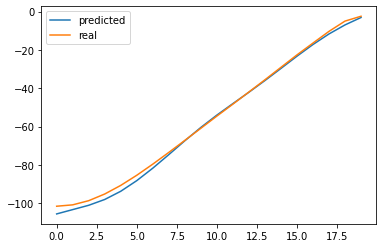

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0989635882467603


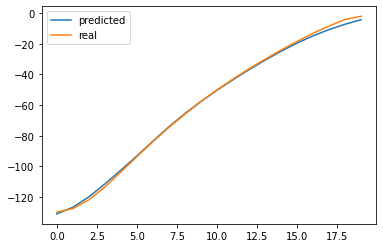

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.104693375317294


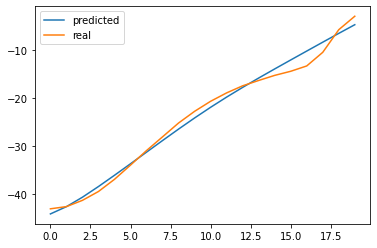

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0773409669718181


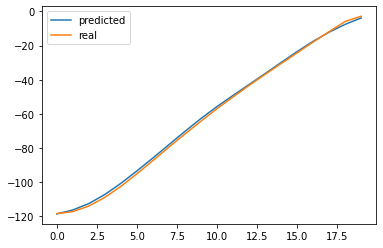

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0630110068124974


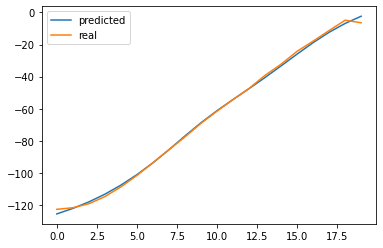

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2700601514985905


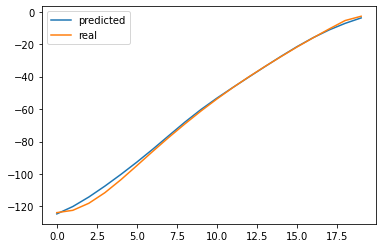

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.8156921125704464


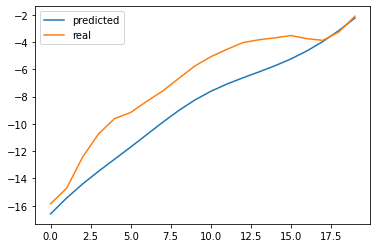

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2364130394829709


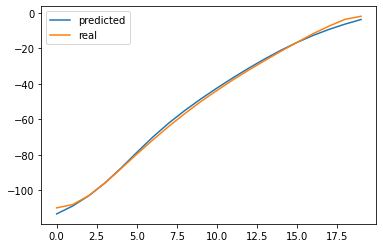

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.6728041200041215


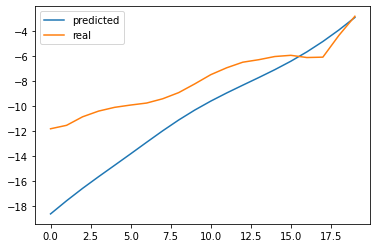

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.4194599056799091


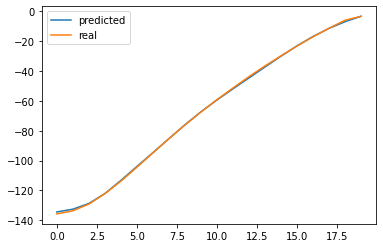

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.9373856041443807


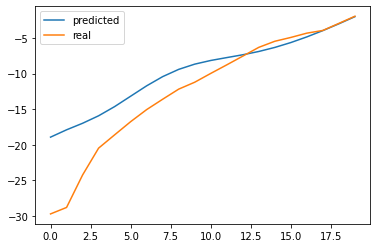

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.8591477147222821


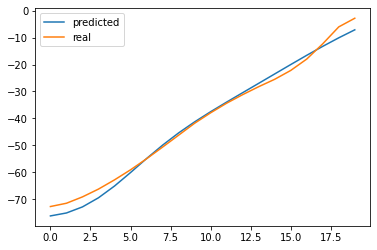

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.899745149429189


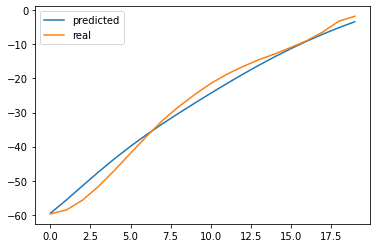

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.995344159987622


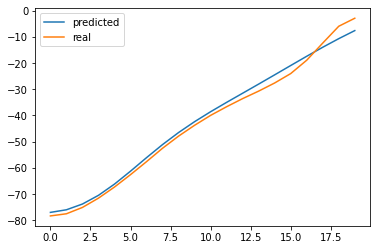

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.730186903053881


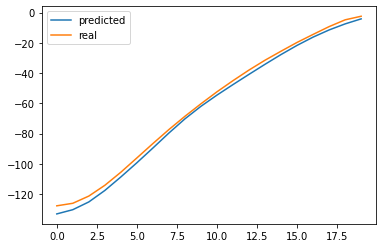

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7611839327084865


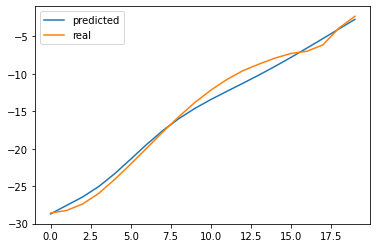

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.7112362526804277


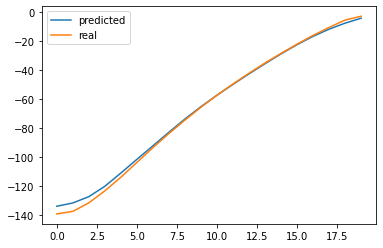

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7055819959595793


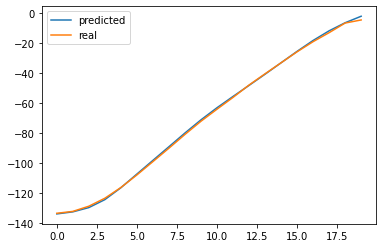

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 6.607868051092227


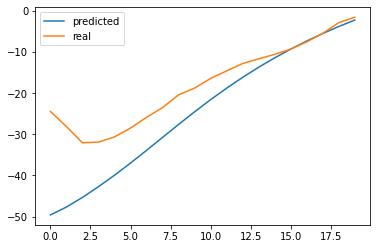

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.6943391078531698


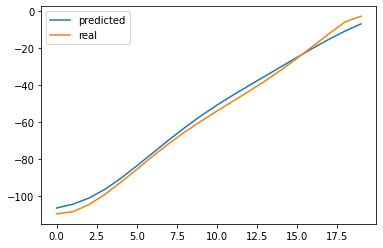

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.910562621880704


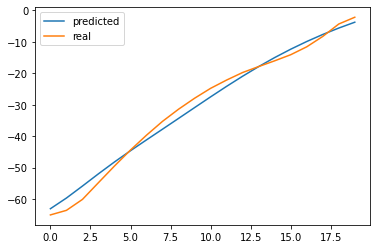

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9848683205015979


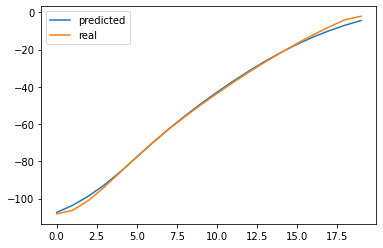

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.6529823530999934


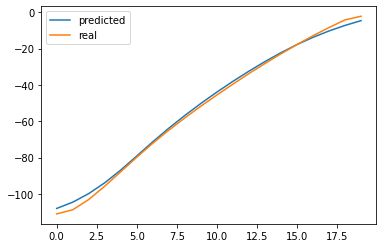

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.159930824734207


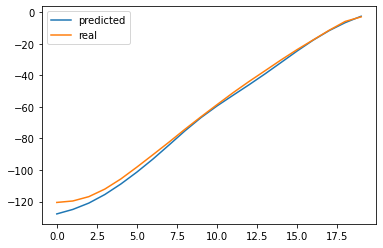

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 4.948248730484746


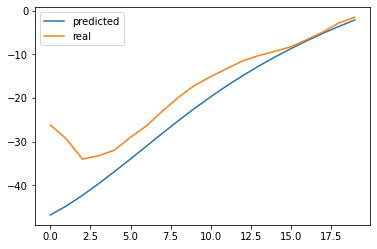

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0645740801909362


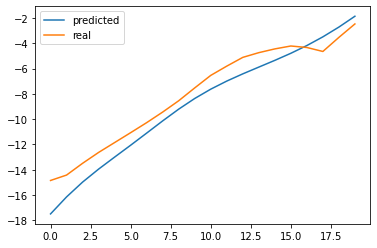

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2282759696101084


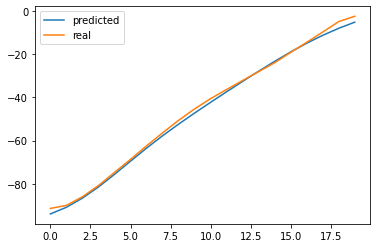

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.4344332744391575


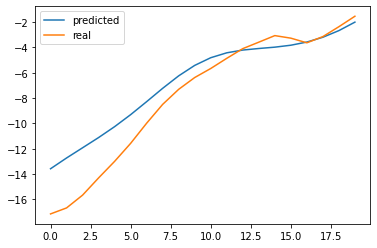

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.581604690367467


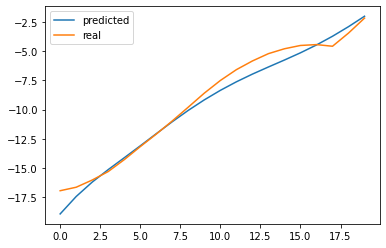

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.6094718221535362


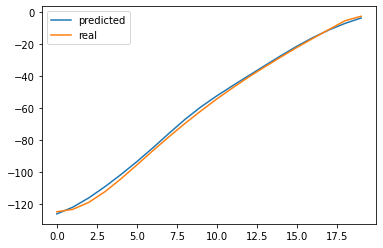

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.8383409086436004


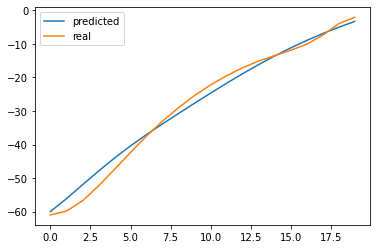

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.363141248623144


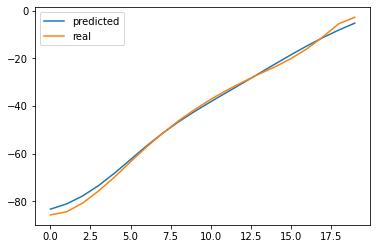

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.3492852224942298


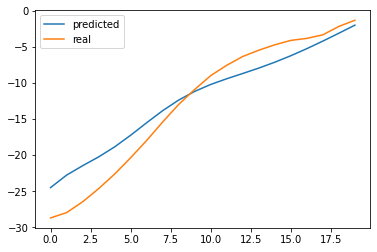

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3611081036363661


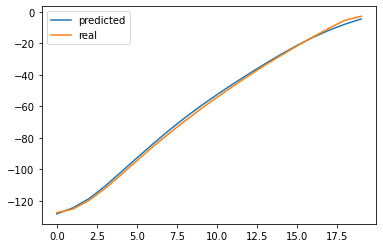

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5665062875168152


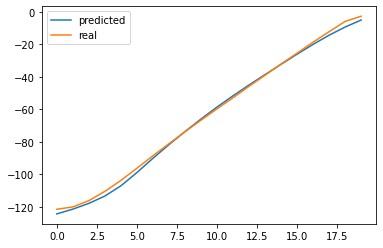

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.993041698124983


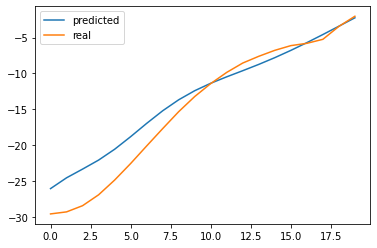

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.9588477899801795


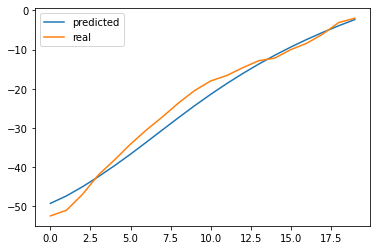

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.123576907113659


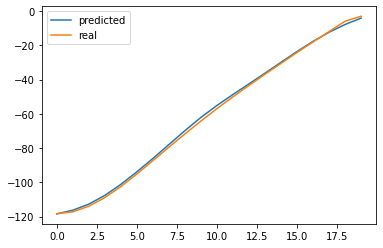

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0602399238605553


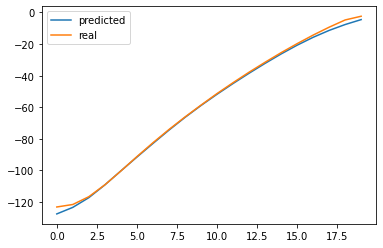

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.823371302054419


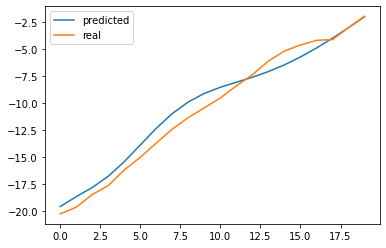

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2982660923197096


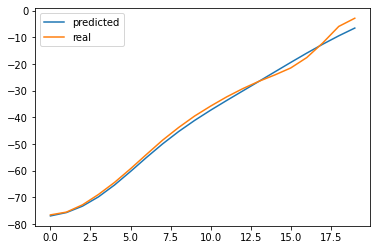

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5313182588739926


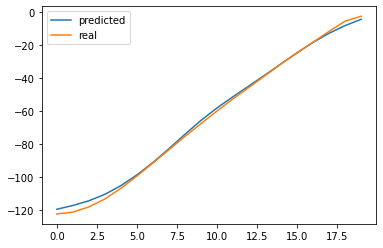

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.67646023687962


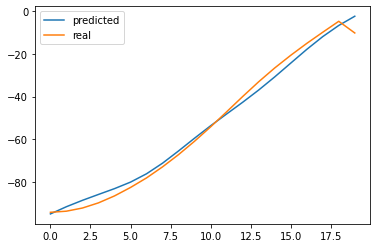

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5560276112192108


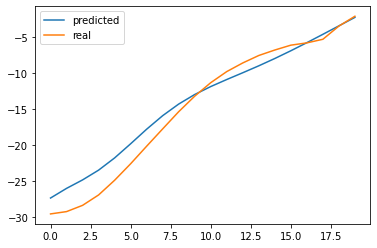

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3862638918104995


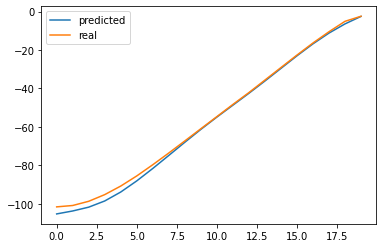

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.8131804326431894


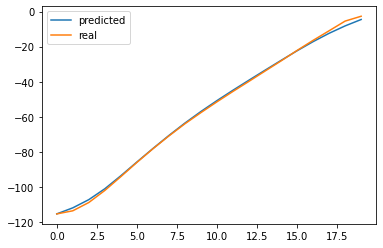

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7111089283849191


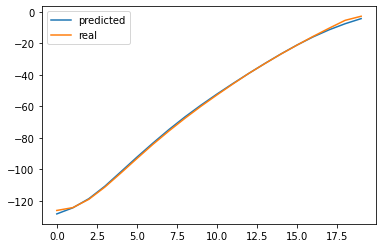

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.8329713696545221


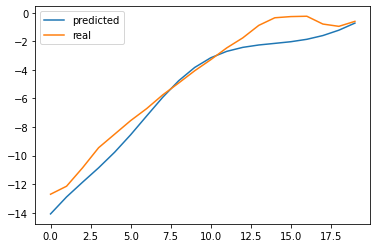

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5426076954420482


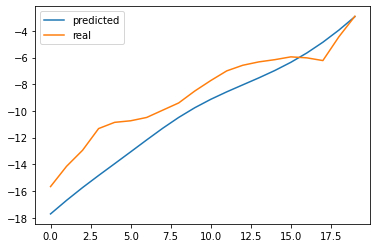

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.402233452828845


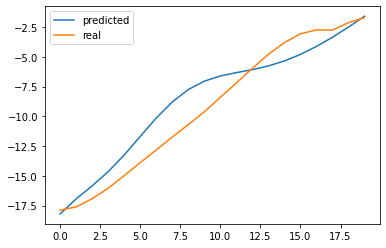

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3504863355164178


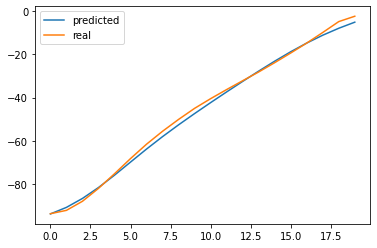

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.471246104555687


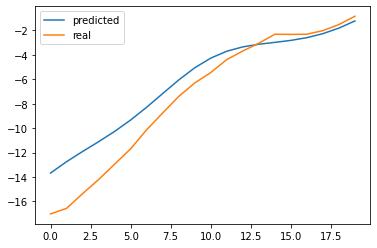

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.8126096492104411


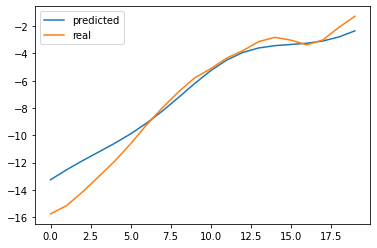

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7153395677896635


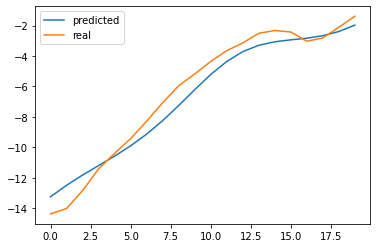

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0361371773526236


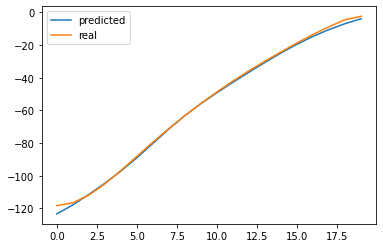

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2152086924085541


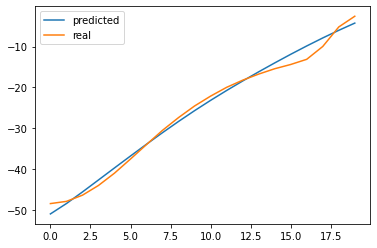

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.6454768612112276


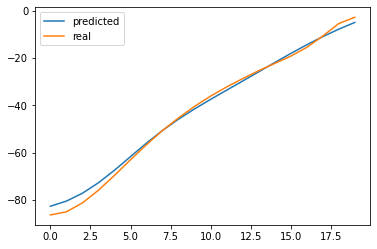

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.1960081819195902


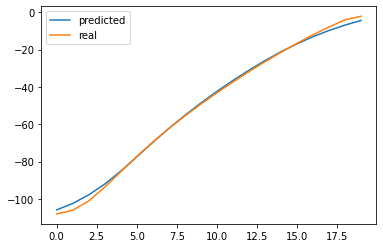

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5088549675825127


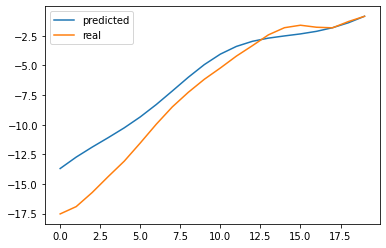

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.525271092579883


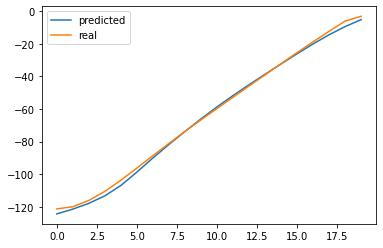

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5048802887333592


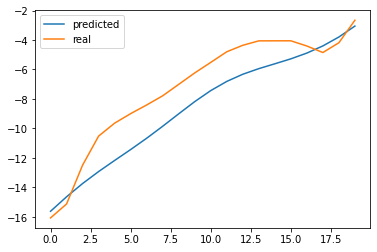

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.623585426811895


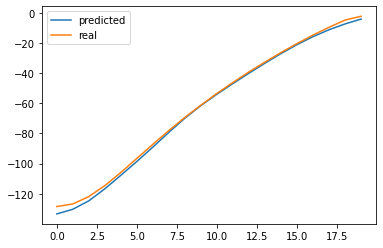

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3444917168170933


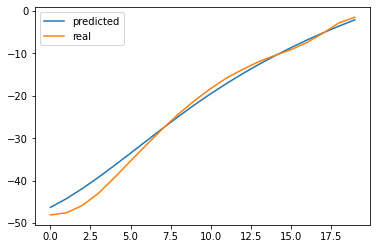

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.7481979265105232


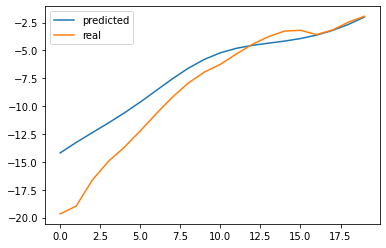

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.809793237432356


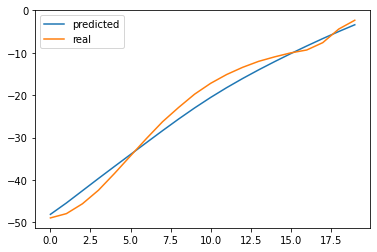

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.94685630006997


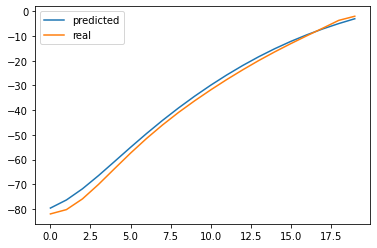

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2983758270016097


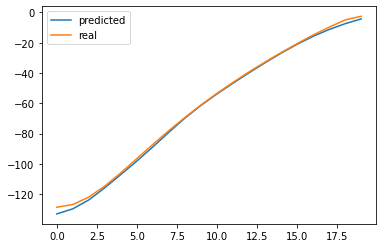

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.4226774714330617


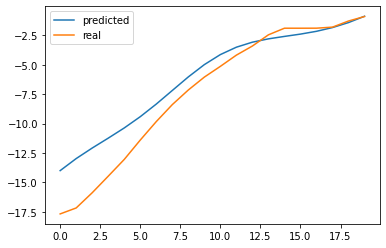

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 3.6033185388257407


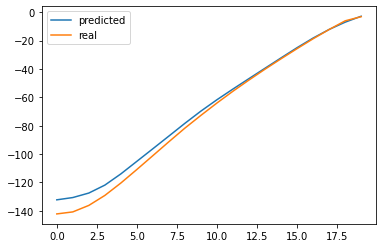

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.187206741214662


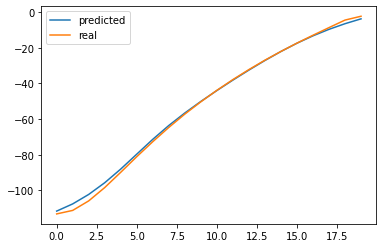

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2471724425536252


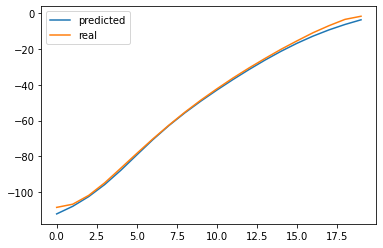

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.4665620661842798


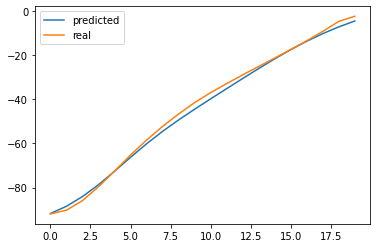

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.9824687499126614


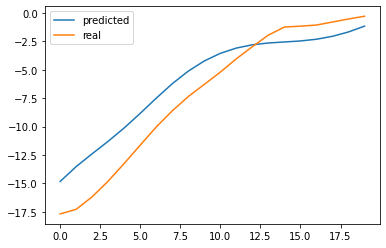

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.0990467822638004


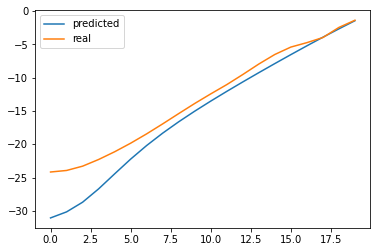

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.1928915978279337


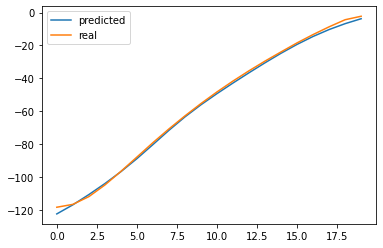

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 3.3247586780900766


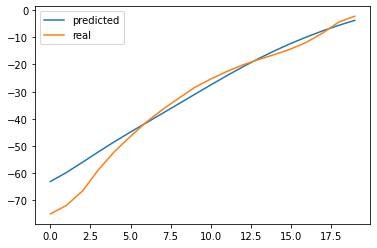

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.461579418065181


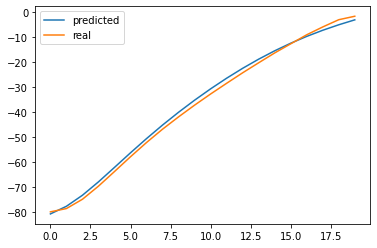

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.5141065270462819


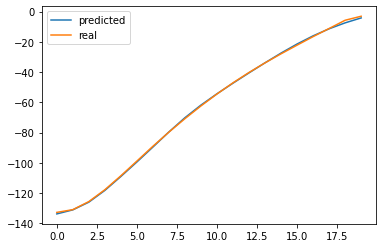

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.036713202984049


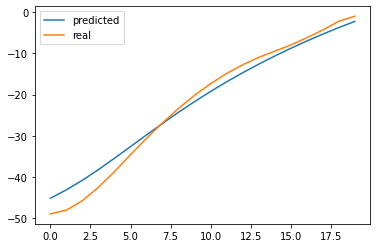

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.2818727930418086


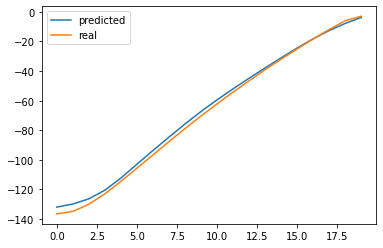

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.3512564023240223


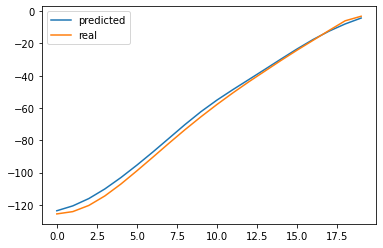

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.809960562801113


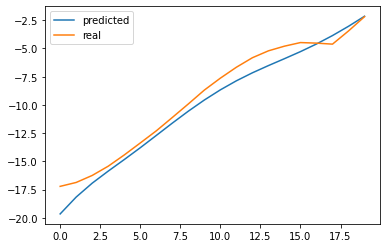

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.4857777426015184


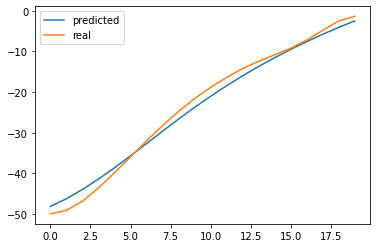

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9818190041929021


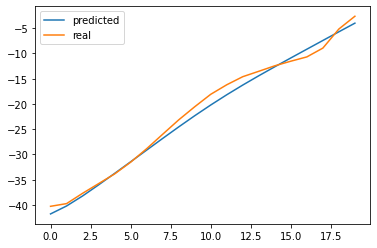

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 4.360331129737474


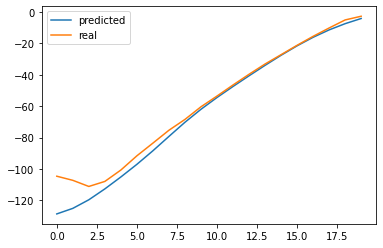

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5286844435775153


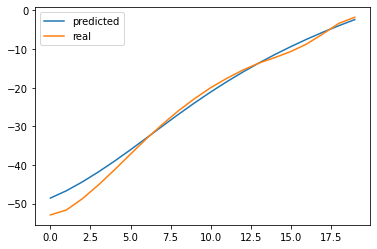

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7282871607500235


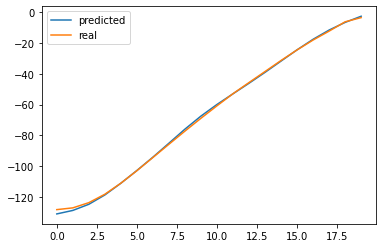

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.203796186932831


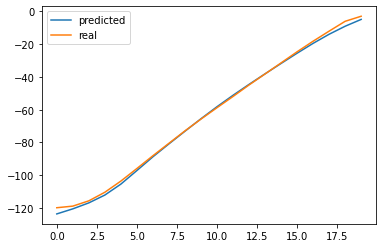

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.488576926688666


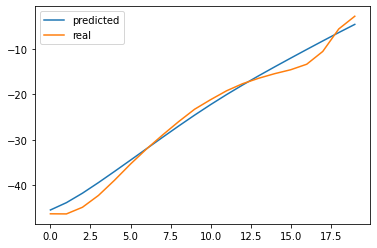

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.9970142465580234


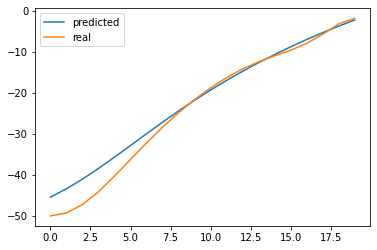

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3246872783526127


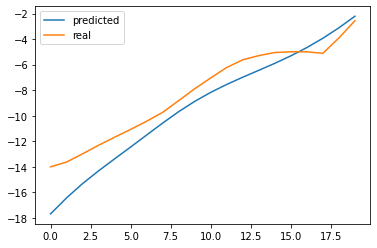

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.148863529876833


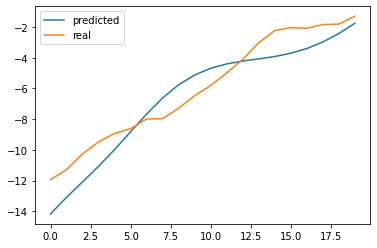

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3253406150148517


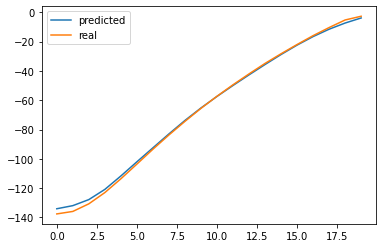

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.39616839780873747


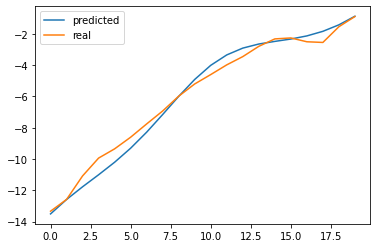

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.4990956023529027


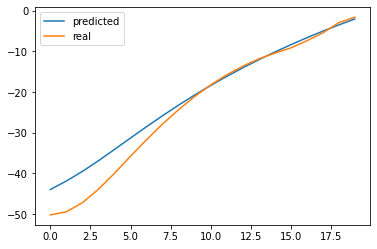

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.4317688972379496


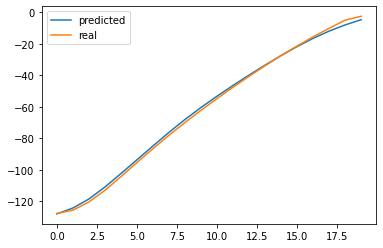

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7717563350948234


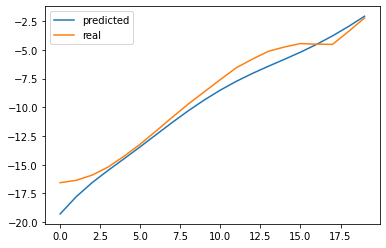

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9703676298193173


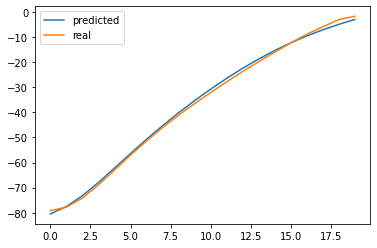

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.465750445411328


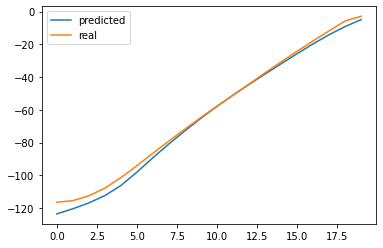

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3339351494005682


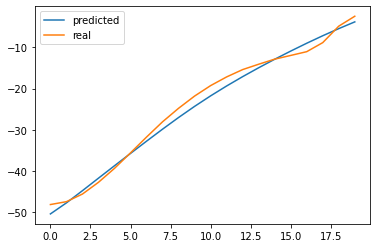

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.1436959884233557


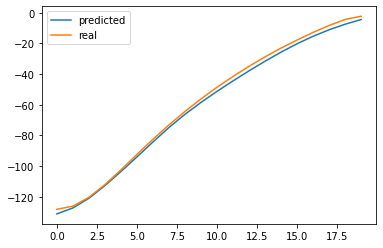

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3864544144432347


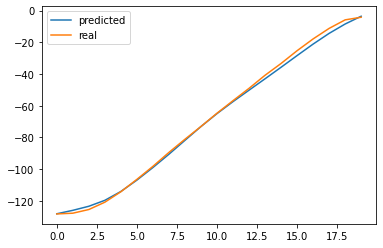

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5589251121612846


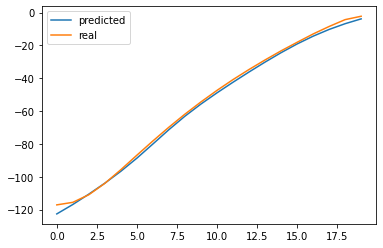

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9223411531187145


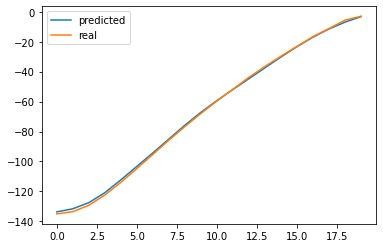

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.4413903978097298


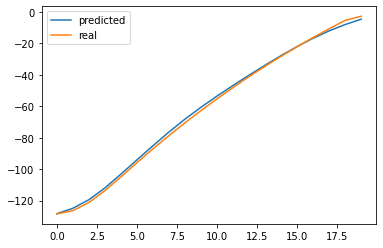

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2947741815573621


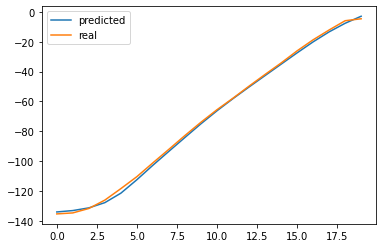

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5476172014697156


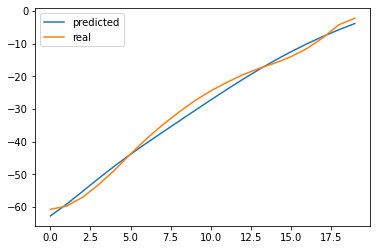

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.8296402125620417


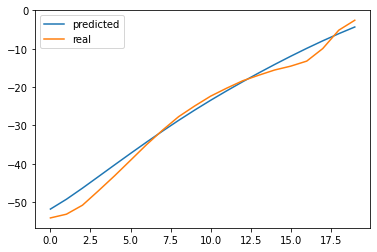

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.9650709462884755


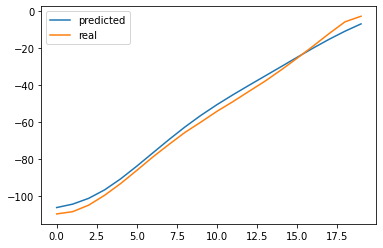

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.5281303674600547


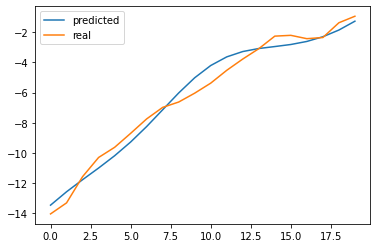

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3048279554468853


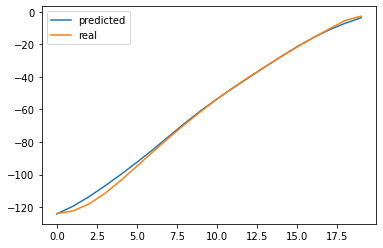

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.85686774878327


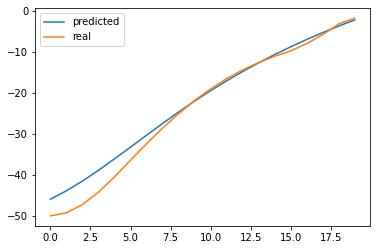

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 4.530443331678379


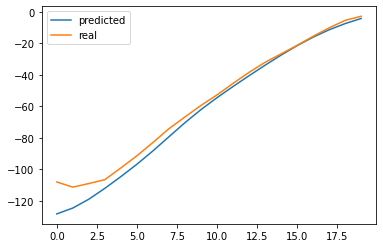

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3971390644115362


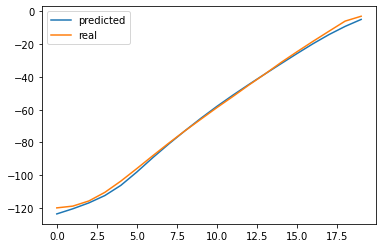

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 3.7871298578580586


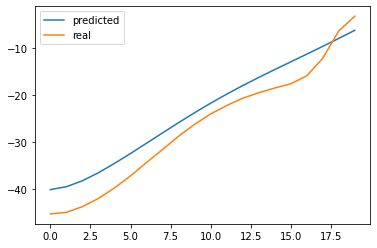

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.1390986933577278


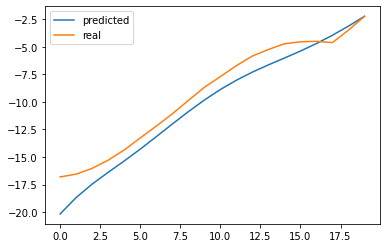

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.8869056668990751


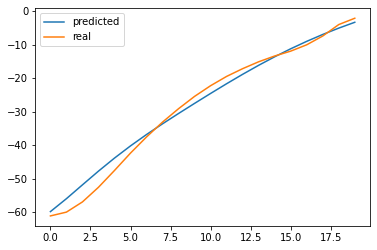

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9638121960956628


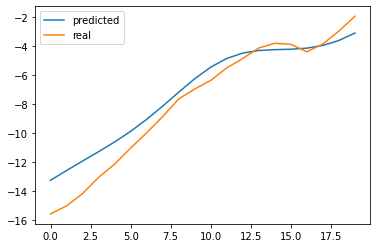

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7071427443466404


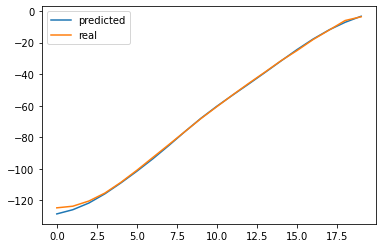

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.936224776892566


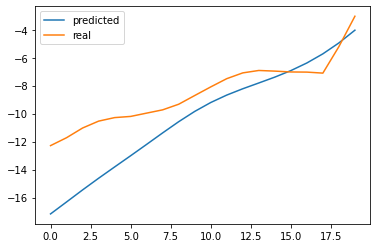

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.7609805536550749


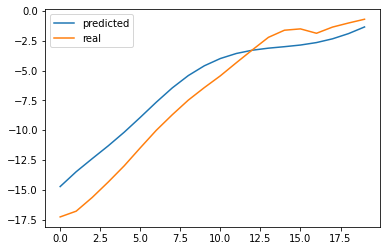

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9188367116478904


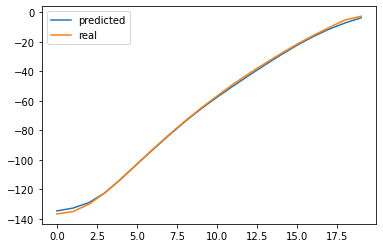

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.124129945404761


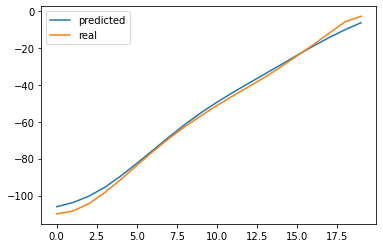

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.9205132113796677


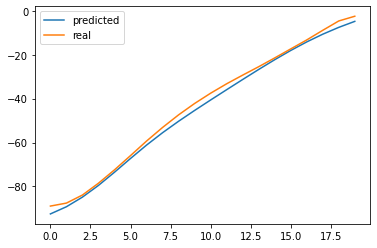

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.7011088081159425


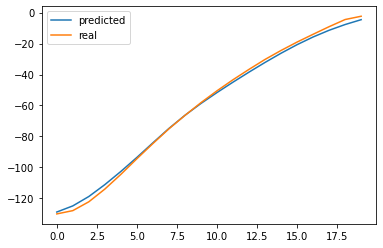

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.5042283069458167


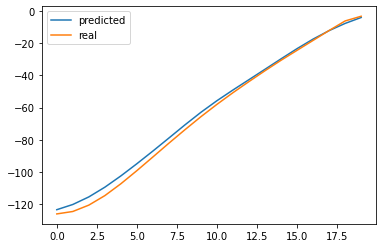

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.0193624280084554


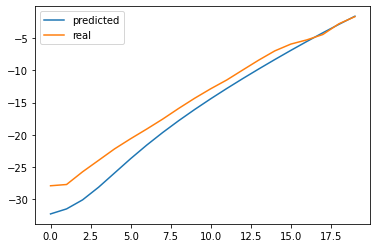

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.6809619155239741


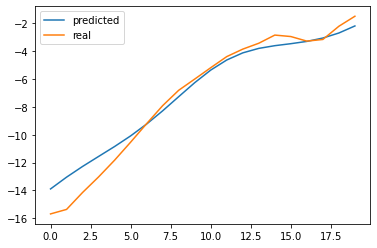

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.205704567463572


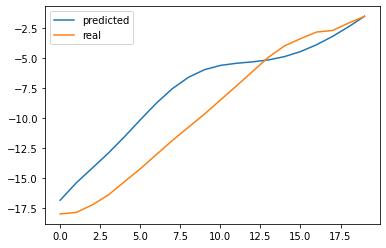

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.1286348081609552


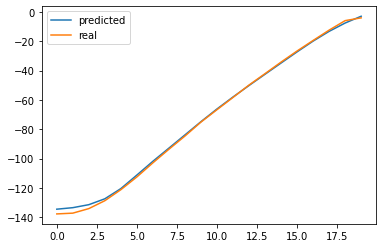

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.9562047298215854


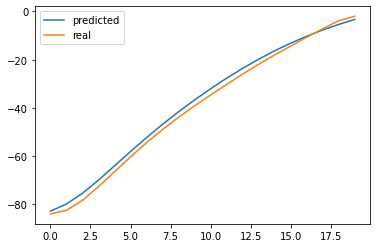

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.2681947831375098


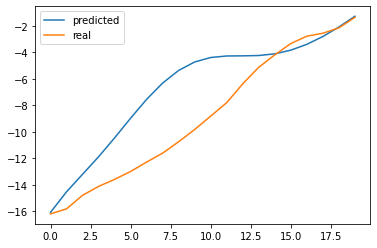

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.2894193966526353


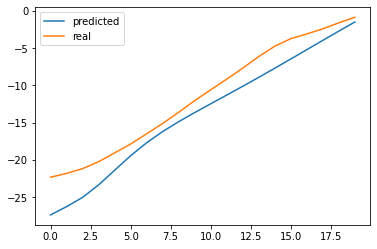

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5512226266343854


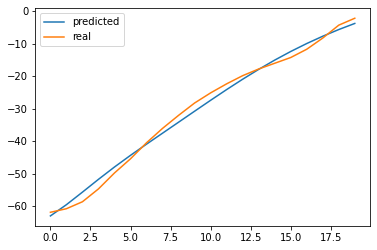

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.1978848117912748


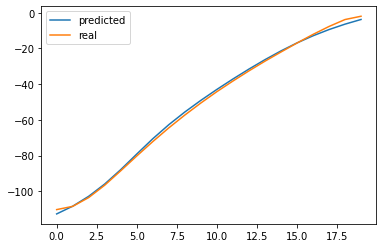

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.505575685673981


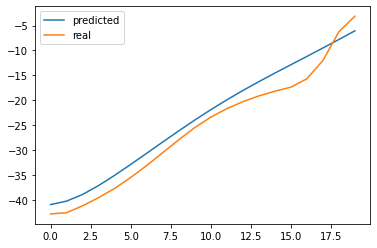

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.5345552280802863


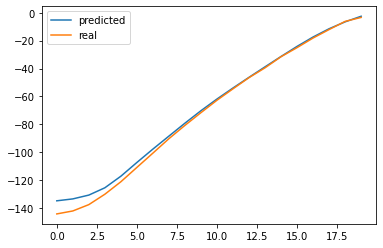

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2011668786954857


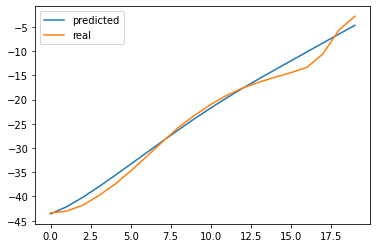

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0900345076649627


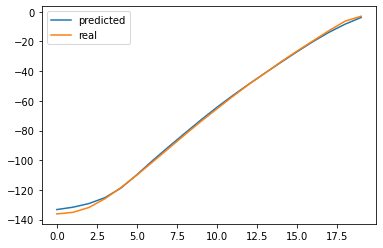

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.6264825652076254


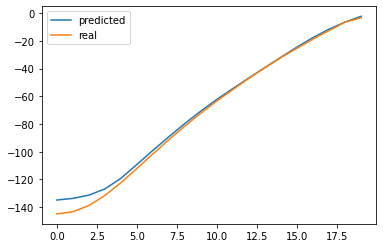

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.842617385128742


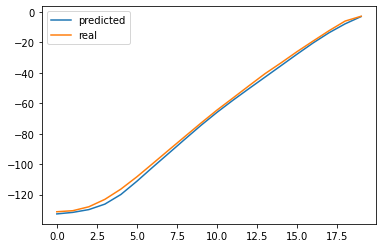

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.786394087118258


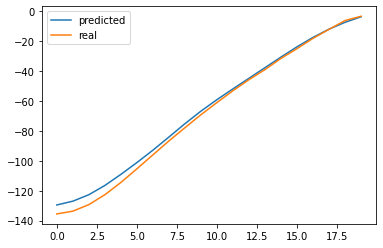

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0361561970116981


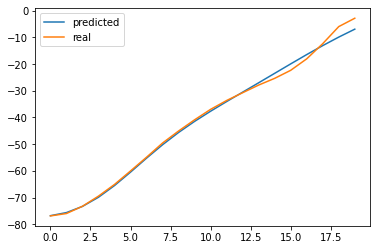

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3805649081633136


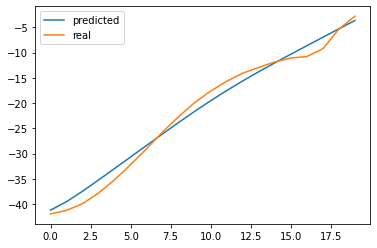

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7655072840901853


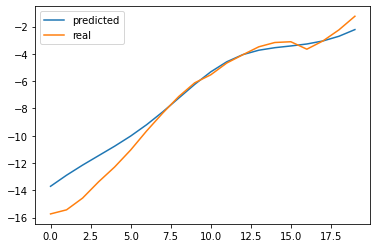

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.8010359604296513


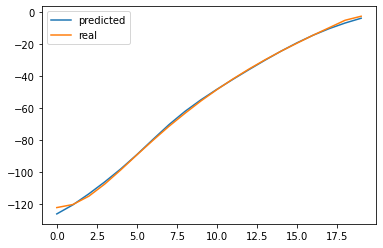

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.374162062919055


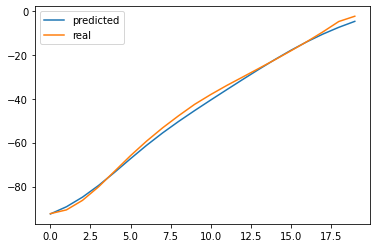

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.313865471150633


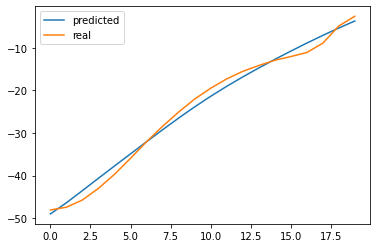

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.1586309901255043


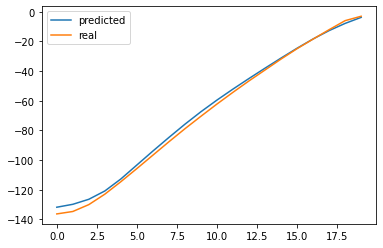

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9105070222268162


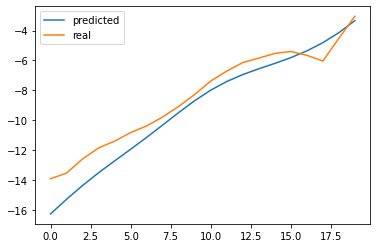

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.542897595689268


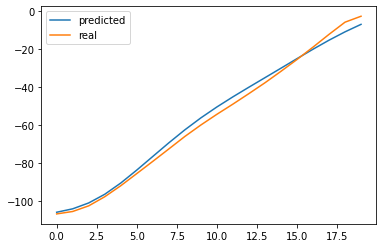

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.6367523820538632


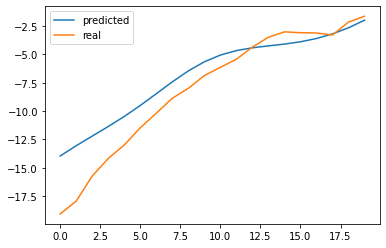

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.1209261532105


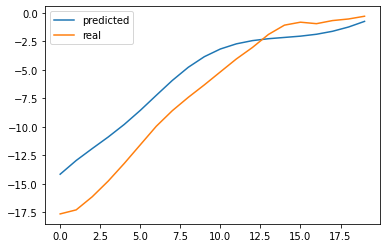

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0556066522141327


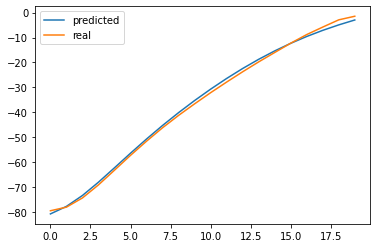

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2024068139003687


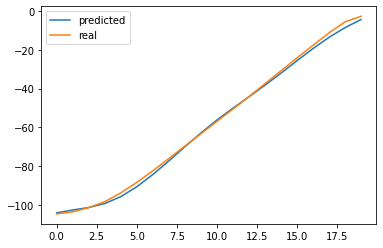

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9819131483458344


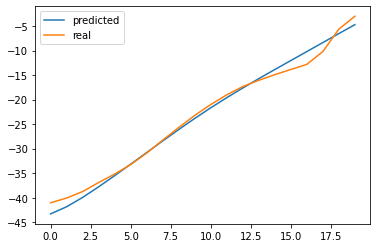

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 3.5670974793081953


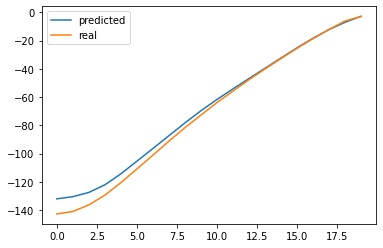

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.8842548408206534


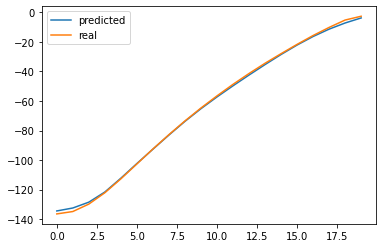

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.8795339917319973


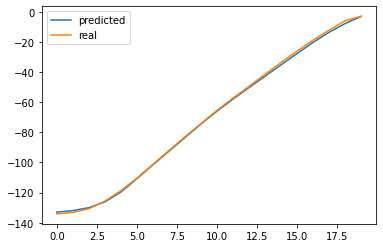

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.7674607001624687


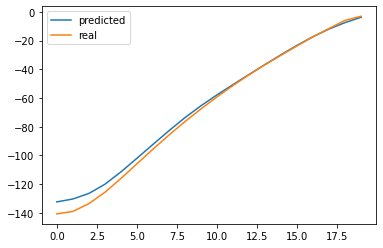

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.942390555055745


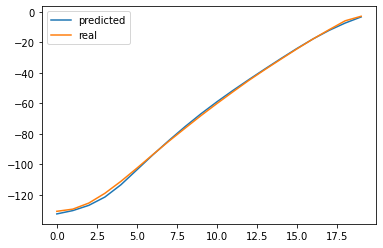

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.2436250168839424


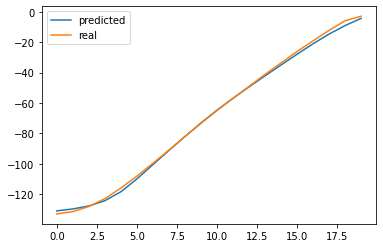

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 3.1383625191158506


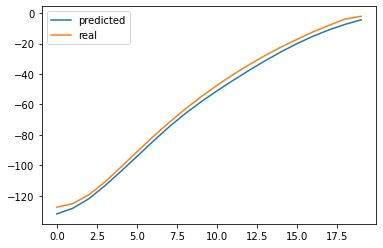

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3345636864146893


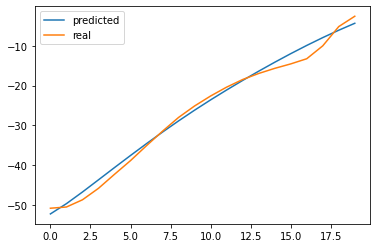

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.6624082714537742


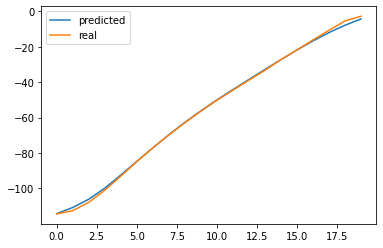

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.9630596259799841


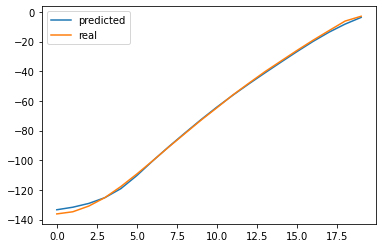

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.6196399524150955


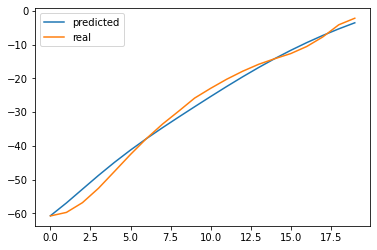

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.0314982942101139


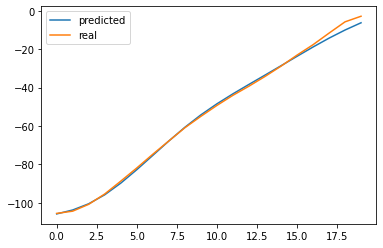

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.7335976149837713


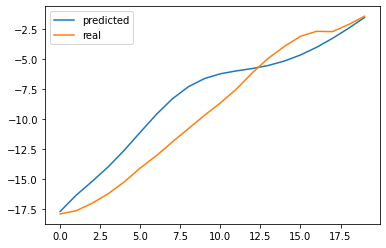

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.5636652777657678


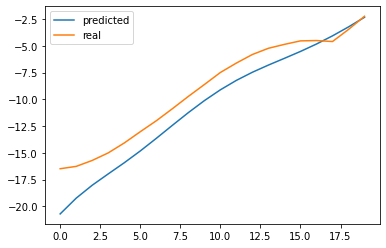

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.3266149890587369


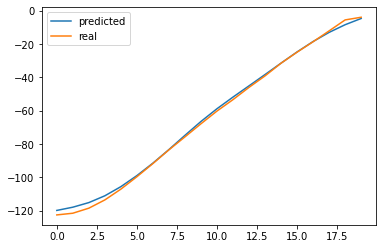

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.058363252114243


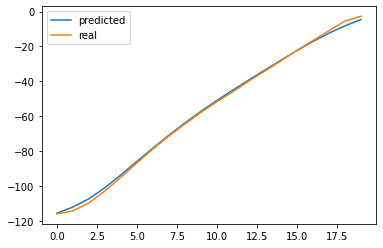

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 0.7121329702735592


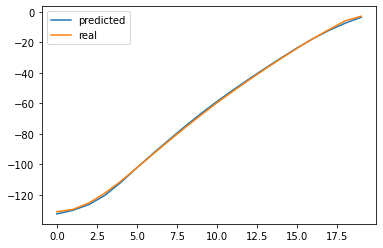

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.7394791963378453


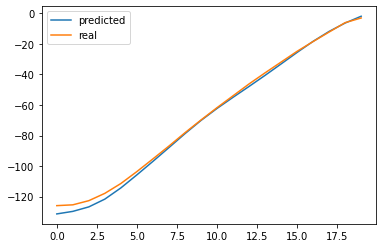

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.6445207044242793


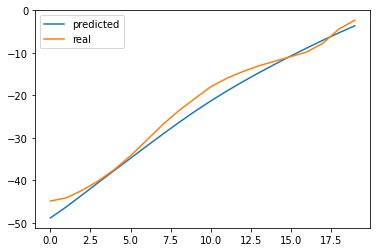

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.9430333690325678


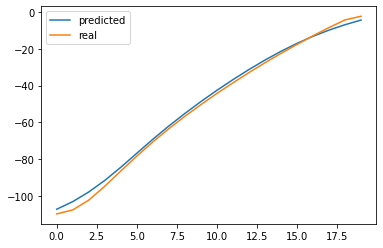

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 1.1451837165292649


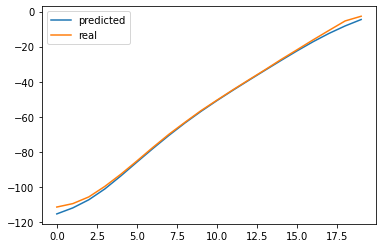

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.5291294300550775


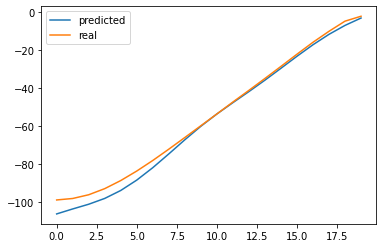

mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = 2.007568355986533


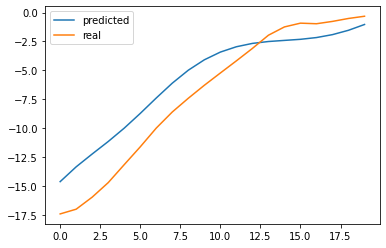

In [76]:
for i in range(0, len(X_test), 20):
    plt.plot(evolved_estimator.predict(X_test[i:i+20]), label='predicted')
    plt.plot(y_test[i:i+20], label='real')
    print(f'{mean_absolute_error(y_test[i:i+20], evolved_estimator.predict(X_test[i:i+20])) = }')
    plt.legend()
    plt.show()


In [92]:
best_estim = evolved_estimator.best_estimator_
saver(best_estim, 'best_estim')

saved in ./best_estim.pkl
